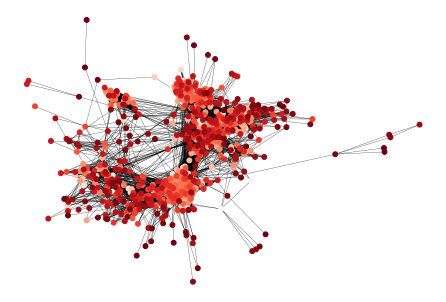

In [78]:
import urllib.request
import io
import gzip
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import numpy as np
import matplotlib.pyplot as plt
import tarfile

# Downloads and extracts file
def downloadFile(URL, fname):
    response = urllib.request.urlopen(URL)
    compressed_file = io.BytesIO(response.read())
    with open(fname, 'wb') as outfile:
        outfile.write(compressed_file.read())
    unpack(fname)

# Visualize network  
def createGraph():
    g=nx.read_edgelist('facebook/107.edges', create_using=nx.Graph(), nodetype=int)
    g = g.to_undirected()
    nx.draw(
    g,
    node_size=24,
    width=0.25,
    cmap=plt.cm.Reds,
    with_labels=False,
    node_color=range(len(g)),
)
    
  
    plt.show()

# getting all filenames with .edges extension
def dirListEdges():
    edgesList = []
    for filename in os.listdir('facebook'):
        if filename.endswith(".edges"):
            edgesList.append(filename)
    return edgesList

if __name__ == "__main__":
    #downloadFile('https://snap.stanford.edu/data/facebook.tar.gz', 'FacebookData')
    createGraph()
    
   


In [110]:
# Returns a list of Dicts, containing: name, number of nodes, number of edges,
# average degree and finally most popular node/person in format(id, amount)
def analyseData():
    dirList = dirListEdges()
    dataList = []
    for i in range(len(dirList)):
        data = {}
        data['filename'] = dirList[i]
        g=nx.read_edgelist('facebook/'+str(dirList[i]), create_using=nx.Graph(), nodetype=int)
        data['no_nodes'] = len(g)
        data['no_edges'] = g.number_of_edges()
        dataList.append(data)
        degreesDict = nx.average_neighbor_degree(g)
        degreesList = list(degreesDict.values())
        data['avg_degree'] = sum(degreesList)/len(degreesList)
        data['node_with_most_edges'] = max(dict(g.degree()).items(), key=lambda x: x[1])
    return dataList

if __name__ == "__main__":
    networkData = analyseData()
    for n in networkData:
        print(n)

{'filename': '0.edges', 'no_nodes': 333, 'no_edges': 2519, 'avg_degree': 24.02689773826816, 'node_with_most_edges': (56, 77)}
{'filename': '107.edges', 'no_nodes': 1034, 'no_edges': 26749, 'avg_degree': 68.48639859862732, 'node_with_most_edges': (1888, 253)}
{'filename': '1684.edges', 'no_nodes': 786, 'no_edges': 14024, 'avg_degree': 47.26860386899869, 'node_with_most_edges': (2839, 136)}
{'filename': '1912.edges', 'no_nodes': 747, 'no_edges': 30025, 'avg_degree': 97.5062025351967, 'node_with_most_edges': (2543, 293)}
{'filename': '3437.edges', 'no_nodes': 534, 'no_edges': 4813, 'avg_degree': 25.835141785795773, 'node_with_most_edges': (3830, 107)}
{'filename': '348.edges', 'no_nodes': 224, 'no_edges': 3192, 'avg_degree': 38.05516803910165, 'node_with_most_edges': (376, 99)}
{'filename': '3980.edges', 'no_nodes': 52, 'no_edges': 146, 'avg_degree': 7.565188484843462, 'node_with_most_edges': (4030, 18)}
{'filename': '414.edges', 'no_nodes': 150, 'no_edges': 1693, 'avg_degree': 28.1038070